You should use this 
```
from CSE185_tSNE import *
```
to import!!

In [1]:
from CSE185_tSNE import *

Try to run the small dataset with our custom small_tsne function. The runtime is 266.3 seconds!

minus!
dot!
eig!
dot!
begin calc P
begin calc D
after calc D
begin calc sigma
after calc sigma
begin cal pji
after cal pji
after calc P
True
1275
0.05199831411747882


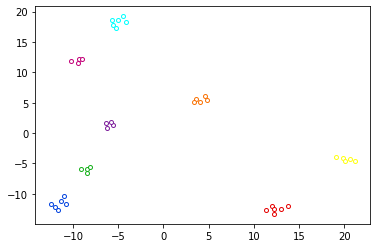

266.3421256542206


In [2]:
import time
t0 = time.time()
tSNE.small_tsne("http://mcb112.org/w13/w13-data-small.tbl")
t1 = time.time()
total = t1-t0
print(total)

Try to run the same small dataset with tSNE of sklearn. The runtime is 1.8s. This is 148x faster than our implementation!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
Color = [ 'xkcd:red',    'xkcd:green',  'xkcd:yellow',  'xkcd:blue',
          'xkcd:orange', 'xkcd:purple', 'xkcd:cyan',    'xkcd:magenta',
          'xkcd:lime',   'xkcd:pink',   'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]

In [4]:
def read_data(infile):
    df = pd.read_table(infile)    # assume a well-formatted Pandas table, tab-delimited, col headers
    ctype = list(df['type'])      # pull column 'type' out, the cell type labels
    df  = df.drop('type', axis=1)  # delete that column, leaving just the count data columns
    X   = np.log2( 1 + df.values)  # convert to log2(counts + 1). The +1 is arbitrary to avoid log(0)
    M,N = X.shape
    return X, ctype, M, N

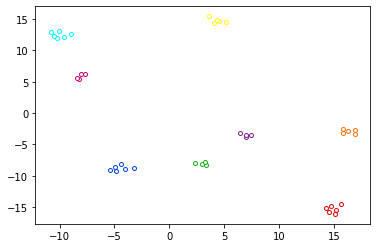

1.8102493286132812


In [5]:
X,  C,  M,  N  = read_data("http://mcb112.org/w13/w13-data-small.tbl")
t2=time.time()
Y = TSNE(perplexity=5).fit_transform(X) 
for i in range(Y.shape[0]):
    plt.plot(Y[i,0], Y[i,1], 'o', markersize=4, mfc='w',mec=Color[int(C[i])])
plt.show()
t3=time.time()
print(t3-t2)

What a big difference here! This implies our tSNE is not efficient enough. 